In [1]:
#!pip install itkwidgets

In [5]:
import keras as keras
import numpy as np
import nibabel as nib                                                     
import itk                                                                
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
from skimage.util import montage 
from skimage.transform import rotate
import os
%matplotlib inline
import seaborn as sns

In [4]:
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
#from keras.layers.experimental import preprocessing
import cv2

In [1]:
import tarfile
file = tarfile.open('./inputs/BraTS2021_Training_Data.tar')

file.extractall('./brain_images')
file.close()

In [17]:
image_path = "./brain_images/BraTS2021_00284/BraTS2021_00284_t1.nii.gz"

from os.path import exists
import os
data_path='./brain_images/BraTS2021_00284/'
print(exists(data_path))
image_path=os.path.join(data_path, 'BraTS2021_00284_seg.nii.gz')
print(exists(image_path))
image_obj = nib.load(image_path)
type(image_obj)


True
True


nibabel.nifti1.Nifti1Image

In [18]:
image_path=os.path.join(data_path, 'BraTS2021_00284_seg.nii.gz')
image_obj = nib.load(image_path)
image_data = image_obj.get_fdata()
print(type(image_data))
image_data.shape


<class 'numpy.ndarray'>


(240, 240, 155)

In [19]:
def visualize_3d(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(image_data[:, :, layer], cmap='gray');
    plt.axis('off')
    return layer

interact(visualize_3d, layer=(0, image_data.shape[2] - 1));


interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [20]:
layer = 50
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

def visualize_3d_labels(layer):
    mask = nib.load('./brain_images/BraTS2021_00284/BraTS2021_00000_seg.nii.gz').get_fdata()
    plt.imshow(mask[:,:,layer])
    plt.axis('off')
    plt.tight_layout()

interact(visualize_3d_labels, layer=(0, image_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

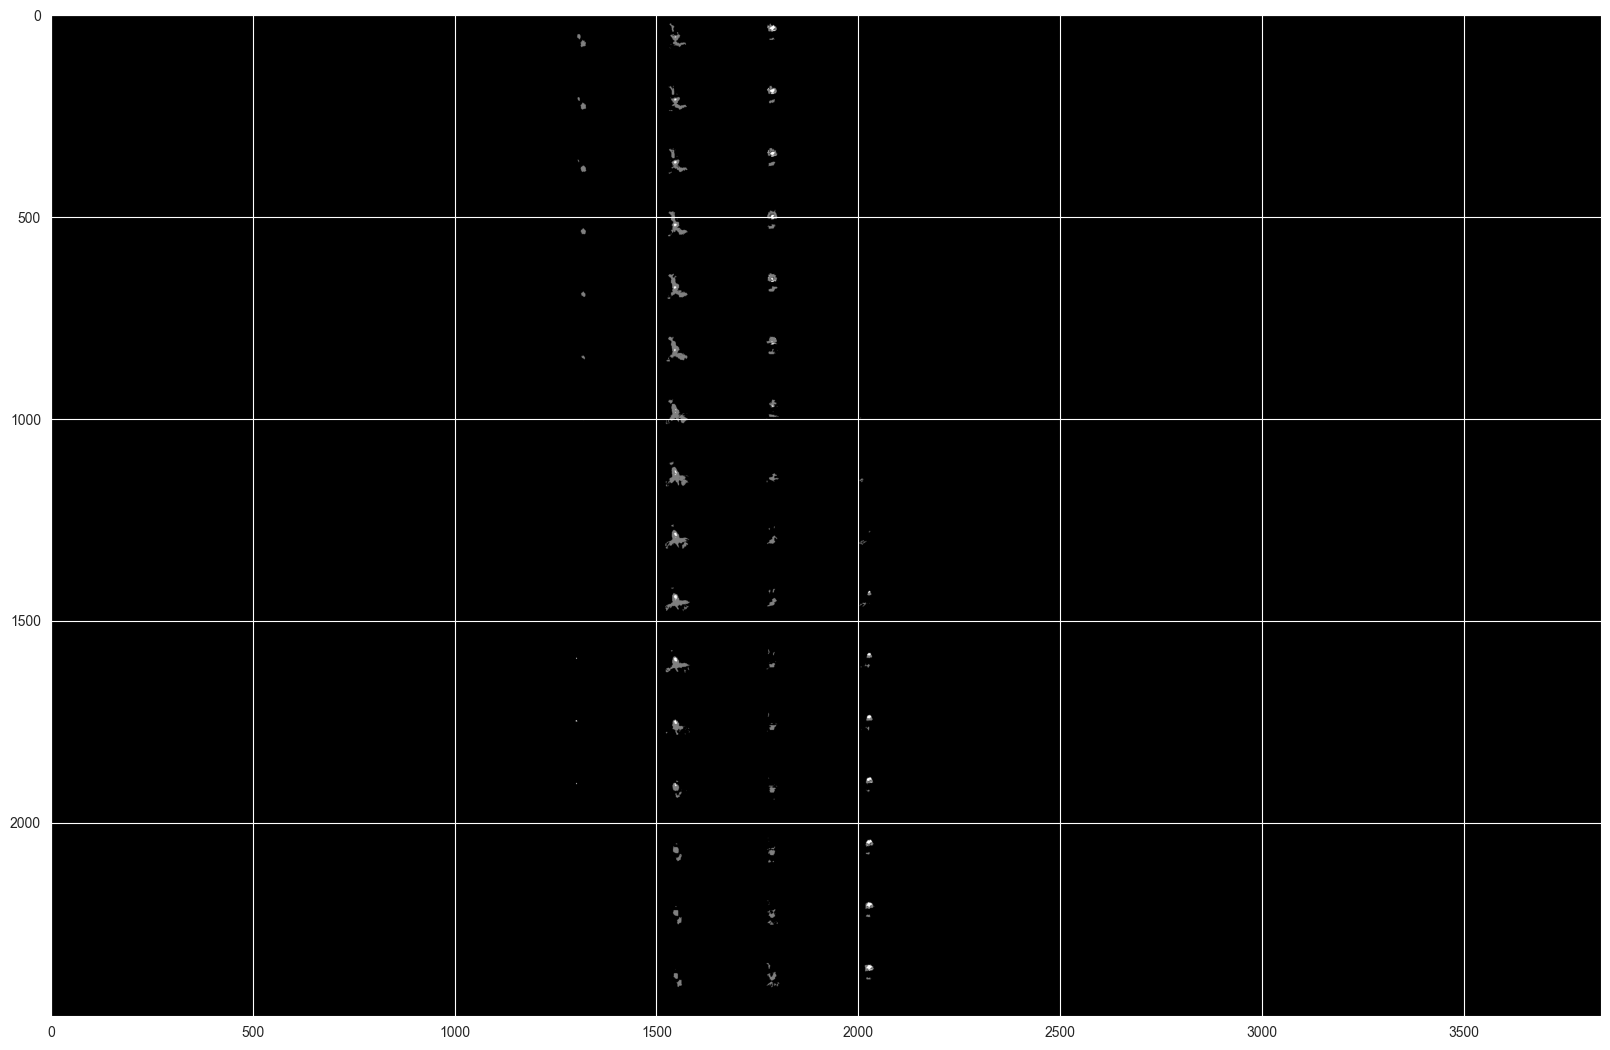

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize = (20,20))
ax1.imshow(rotate(montage(image_data[:,:,:]), 90, resize=True), cmap ='gray')

In [2]:

def convert_data_2D(data):

    #data_new = np.empty((image_count,240, 240,155),dtype=np.int32)


    x_train_ten = tf.convert_to_tensor(train_x)
    x_train_ten = tf.convert_to_tensor(train_y)


In [6]:
#train data x
y=y.reshape([20*155,240,240,1])
x=x.reshape([20*155,240,240,1])
train_x=np.zeros((2,240,240,155,1))
image_obj = nib.load('./brain_images/BraTS2021_00000/BraTS2021_00000_flair.nii.gz')
image_data0 = image_obj.get_fdata()
image_data0=np.expand_dims(image_data0, axis=0)
image_data0=np.expand_dims(image_data0, axis=-1)
print(image_data0.shape)

train_x[0]=image_data0
train_x[1]=image_data0

#train data y
train_y=np.zeros((2,240,240,155,1))

image_obj = nib.load('./brain_images/BraTS2021_00000/BraTS2021_00000_seg.nii.gz')
image_data0 = image_obj.get_fdata()

fig, ax1 = plt.subplots(1, 1, figsize = (20,20))
#ax1.imshow(rotate(montage(image_data0[:,:,:]), 90, resize=True), cmap ='gray')

image_data0=np.expand_dims(image_data0, axis=0)
image_data0=np.expand_dims(image_data0, axis=-1)
print(image_data0.shape)

train_y[0]=image_data0
train_y[1]=image_data0

NameError: name 'y' is not defined

In [24]:
a=image_obj.get_fdata()


In [7]:
from keras.utils import to_categorical

path='./brain_images/'
x,y=import_images(path)

x_pre= np.zeros((20,240,240,160), dtype=np.int32)
x_pre[:,:,:,1:156] = x
x=x_pre

y_pre= np.zeros((20,240,240,160), dtype=np.int32)
y_pre[:,:,:,1:156] = y
y=y_pre

#train_y = to_categorical(train_y, num_classes=5)
y=to_categorical(y, num_classes=5)

In [26]:
np.pad(x,0)

NameError: name 'x' is not defined

In [27]:
from tensorflow import int16

# create 2D Data
train_2D_x=np.zeros((155,240,240,1))
train_2D_y=np.zeros((155,240,240,5))

for i in range(155):
    train_2D_x[i]=train_x[0,:,:,i]
    train_2D_y[i]=train_y[0,:,:,i]

train_2D_x = tf.convert_to_tensor(train_2D_x,dtype=int16)
train_2D_y = tf.convert_to_tensor(train_2D_y,dtype=int16)

print('Created 2D Data')


ValueError: could not broadcast input array from shape (240,240) into shape (240,240,1)

In [28]:
#create 2D CNN model
def get_2D_model():

    """Build a 3D convolutional neural network model."""

    ker_init='he_normal'

    inputs = keras.Input(shape=(240,240,1))

    x = Conv2D(filters=8, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(filters=8, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=2)(x)

    x = Conv2D(filters=16, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=16, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=2)(x)

    x = Conv2D(filters=64, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=2)(x)


    #x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
    x = UpSampling2D()(x)
    x = Conv2D(filters=64, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)

    x = UpSampling2D()(x)
    x = Conv2D(filters=32, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=32, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)

    x = UpSampling2D()(x)
    x = Conv2D(filters=16, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=16, kernel_size=3, activation="relu",kernel_initializer = ker_init,padding="same")(x)
    x = BatchNormalization()(x)

    #x = Conv2DTranspose(filters=1, kernel_size=3, activation="softmax",padding="same")(x)
    #x = Conv2DTranspose(filters=1, kernel_size=3)(x)
    x = Conv2D(5, (1,1), activation = 'softmax')(x)
    outputs=x

    #outputs = layers.Dense(units=240*240*1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="2dcnn")
    return model
model = get_2D_model()
model.summary()

Model: "2dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 240, 240, 8)       80        
                                                                 
 batch_normalization_4 (Batc  (None, 240, 240, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 8)       584       
                                                                 
 batch_normalization_5 (Batc  (None, 240, 240, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 8)      0     

In [30]:
from keras.metrics import MeanIoU, OneHotMeanIoU
#from sklearn.metrics import recall_score, f1_score, precision_score
from keras import metrics

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),
              metrics = ['accuracy','categorical_accuracy',OneHotMeanIoU (num_classes=5)
                                   ]
              # metrics = ['accuracy','sparse_categorical_accuracy','categorical_accuracy','categorical_crossentropy',#MeanIoU(num_classes=5)
              #                     ]
              )

#tf.keras.metrics.MeanIoU(num_classes=2)]

model.fit(train_2D_x[:100],train_2D_y[:100],batch_size=100,epochs=100,
          validation_data=(train_2D_x[1000:],train_2D_y[1000:]))

Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node '2dcnn/conv2d_10/Relu' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Timo\AppData\Local\Temp\ipykernel_8640\1519659025.py", line 14, in <module>
      model.fit(train_2D_x[:100],train_2D_y[:100],batch_size=100,epochs=100,
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: '2dcnn/conv2d_10/Relu'
Detected at node '2dcnn/conv2d_10/Relu' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Timo\AppData\Local\Temp\ipykernel_8640\1519659025.py", line 14, in <module>
      model.fit(train_2D_x[:100],train_2D_y[:100],batch_size=100,epochs=100,
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Timo\PycharmProjects\BRaTS_2021\venv\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: '2dcnn/conv2d_10/Relu'
2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[100,32,240,240] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node 2dcnn/conv2d_10/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[confusion_matrix/assert_less/Assert/AssertGuard/pivot_f/_21/_45]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[100,32,240,240] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node 2dcnn/conv2d_10/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_6817]

In [23]:
print(x.shape)
print(np.unique(x))

print(y.shape)
print(np.unique(y))

#prey=model.predict(x[1000])

(3100, 240, 240, 1)
[   0    1    2 ... 4087 4092 4097]
(3100, 240, 240, 1)
[0 1 2 4]


ValueError: in user code:

    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d_9" "                 f"(type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node 2dcnn/max_pooling2d_9/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](2dcnn/batch_normalization_37/FusedBatchNormV3)' with input shapes: [?,240,1,8].
    
    Call arguments received by layer "max_pooling2d_9" "                 f"(type MaxPooling2D):
      • inputs=tf.Tensor(shape=(None, 240, 1, 8), dtype=float32)


In [8]:
# simple 3d
#create 2D CNN model



Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 160, 1  0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 240, 240, 160, 4)  112       
                                                                 
 batch_normalization (BatchN  (None, 240, 240, 160, 4)  16       
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 240, 240, 160, 4)  436       
                                                                 
 batch_normalization_1 (Batc  (None, 240, 240, 160, 4)  16       
 hNormalization)                                                 
                                                             

In [10]:
from keras.metrics import MeanIoU, OneHotMeanIoU
#from sklearn.metrics import recall_score, f1_score, precision_score
from keras import metrics

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy', 'categorical_accuracy', OneHotMeanIoU(num_classes=5)
                       ]
              # metrics = ['accuracy','sparse_categorical_accuracy','categorical_accuracy','categorical_crossentropy',#MeanIoU(num_classes=5)
              #                     ]
              )

#tf.keras.metrics.MeanIoU(num_classes=2)]

model.fit(x[:50], y[:50], batch_size=1, epochs=100,
          validation_data=(x[10:], y[10:]))
print(x.shape)
print(np.unique(x))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [80]:
y.shape
x.shape

(20, 240, 240, 155, 5)

In [54]:
from keras import layers

def get_model():

    """Build a 3D convolutional neural network model."""

    inputs = keras.Input(shape=(240,240,155,1))

    x = layers.Conv3D(filters=16, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=16, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=16, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=16, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=16, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=240*240*155*1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model()
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 240, 240, 155, 1  0         
                             )]                                  
                                                                 
 conv3d_26 (Conv3D)          (None, 238, 238, 153, 16  448       
                             )                                   
                                                                 
 max_pooling3d_26 (MaxPoolin  (None, 119, 119, 76, 16)  0        
 g3D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 119, 119, 76, 16)  64       
 chNormalization)                                                
                                                                 
 conv3d_27 (Conv3D)          (None, 117, 117, 74, 16)  6928  

In [53]:
model=get_model()
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4)] )

model.fit(x_train,y_train,batch_size=1,epochs=1)

ValueError: in user code:

    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\users\vdwti\pycharmprojects\brats_2021\venv\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (1, 240, 240, 155, 1) and (1, 240) are incompatible


In [36]:
model=model_complicated((224,224,155,1))

ValueError: Input 0 of layer "max_pooling2d_1" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 224, 224, 155, 64)

In [37]:
def simple_rd_cnn():
    # Create the model
    model = Sequential()
    model.add(keras.Input(shape=(240,240,155,1)))
    model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.5))
    model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=10, activation='softmax'))
    return model


In [35]:
def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn
def res_conv_block(x, filter_size, size, dropout, batch_norm=False):
    '''
    Residual convolutional layer.
    '''

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    #Activation after addition with shortcut (Original residual block)
    return res_path
def model_complicated(input_shape):
    '''
    Rsidual UNet, with attention

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    NUM_CLASSES=1
    dropout_rate=0.0
    batch_norm=True
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = Model(inputs, conv_final, name="AttentionResUNet")
#     print(model.summary())
    return model

In [ ]:
model=simple_rd_cnn()


KeyboardInterrupt



In [ ]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, epsilon=0.00001):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    
    """
    axis = (0,1,2,3)
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true*y_true, axis=axis) + K.sum(y_pred*y_pred, axis=axis) + epsilon
    return K.mean((dice_numerator)/(dice_denominator))


 
# define per class evaluation of dice coef
# inspired by https://github.com/keras-team/keras/issues/9395
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[0,:,:,:,1] * y_pred[0,:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[0,:,:,:,1])) + K.sum(K.square(y_pred[0,:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[0,:,:,:,2] * y_pred[0,:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[0,:,:,:,2])) + K.sum(K.square(y_pred[0,:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[0,:,:,:,3] * y_pred[0,:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[0,:,:,:,3])) + K.sum(K.square(y_pred[0,:,:,:,3])) + epsilon)



# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    
# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
IMG_SIZE=128

In [ ]:
TRAIN_DATASET_PATH = './brain_images'

file = tarfile.open('./inputs/BraTS2021_00621.tar')
file.extractall('./val_brain_images')
file.close()

In [ ]:
import os
train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]

In [ ]:
VALIDATION_DATASET_PATH = '../val_brain_images'

In [ ]:
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories); 

    
train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2) 
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15) 

In [ ]:
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE
    2 : 'EDEMA',
    3 : 'ENHANCING' # original 4 -> converted into 3 later
}

# there are 155 slices per volume
# to start at 5 and use 145 slices means we will skip the first 5 and last 5 
VOLUME_SLICES = 128 
VOLUME_START_AT = 22 # first slice of volume that we will include

In [ ]:
keras = tf.compat.v1.keras
Sequence = keras.utils.Sequence

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 128, 128))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))

        
        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(TRAIN_DATASET_PATH, i)

            data_path = os.path.join(case_path, f'{i}_flair.nii.gz');
            flair = nib.load(data_path).get_fdata()    

            data_path = os.path.join(case_path, f'{i}_t1ce.nii.gz');
            ce = nib.load(data_path).get_fdata()
            
            data_path = os.path.join(case_path, f'{i}_seg.nii.gz');
            seg = nib.load(data_path).get_fdata()
        
            for j in range(VOLUME_SLICES):
             X[j+(VOLUME_SLICES*c),:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

             X[j+(VOLUME_SLICES*c),:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
             
             
             y[j +VOLUME_SLICES*c,:,:] = cv2.resize(seg[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

        X = X.reshape(1,128,128,128,2)
        y = y.reshape(1,128,128,128)
        # Generate masks
        y[y==4] = 3;
        y = tf.one_hot(y, 4);
        #Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        #Y = np.array(Y).reshape(1,128,128,128)
        return X/np.max(X), y
        
training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)

In [ ]:
csv_logger = CSVLogger('training.log', separator=',', append=False)


callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,
                               patience=2, verbose=1, mode='auto'),
      keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1),
      keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.m5',
                             verbose=1, save_best_only=True, save_weights_only = True),
      csv_logger
    ]


In [ ]:
def conv_block(input_mat,num_filters,kernel_size,batch_norm):
  X = Conv3D(num_filters,kernel_size=(kernel_size,kernel_size,kernel_size),strides=(1,1,1),padding='same')(input_mat)
  if batch_norm:
    X = BatchNormalization()(X)
  
  X = Activation('relu')(X)

  X = Conv3D(num_filters,kernel_size=(kernel_size,kernel_size,kernel_size),strides=(1,1,1),padding='same')(X)
  if batch_norm:
    X = BatchNormalization()(X)
  
  X = Activation('relu')(X)
    
  X = add([input_mat,X]);
  
  return X


def Vnet_3d(input_img, n_filters = 8, dropout = 0.2, batch_norm = True):

  #c1 = conv_block(input_img,n_filters,3,batch_norm)
  c1 = Conv3D(n_filters,kernel_size = (5,5,5) , strides = (1,1,1) , padding='same')(input_img)
  #c1 = add([c1,input_img])
  
  c2 = Conv3D(n_filters*2,kernel_size = (2,2,2) , strides = (2,2,2) , padding = 'same' )(c1)
  
  c3 = conv_block(c2 , n_filters*2,5,True)
  
  p3 = Conv3D(n_filters*4,kernel_size = (2,2,2) , strides = (2,2,2), padding = 'same')(c3)
  p3 = Dropout(dropout)(p3)
  
  c4 = conv_block(p3, n_filters*4,5,True)
  p4 = Conv3D(n_filters*8,kernel_size = (2,2,2) , strides = (2,2,2) , padding='same')(c4)
  p4 = Dropout(dropout)(p4)
    
  c5 = conv_block(p4, n_filters*8,5,True)
  p6 = Conv3D(n_filters*16,kernel_size = (2,2,2) , strides = (2,2,2) , padding='same')(c5)
  p6 = Dropout(dropout)(p6)
  #c6 = conv_block(p5, n_filters*8,5,True)
  #p6 = Conv3D(n_filters*16,kernel_size = (2,2,2) , strides = (2,2,2) , padding='same')(c6)

  p7 = conv_block(p6,n_filters*16,5,True)
    
  u6 = Conv3DTranspose(n_filters*8, (2,2,2), strides=(2, 2, 2), padding='same')(p7);
  u6 = concatenate([u6,c5]);
  c7 = conv_block(u6,n_filters*16,5,True)
  c7 = Dropout(dropout)(c7)
  u7 = Conv3DTranspose(n_filters*4,(2,2,2),strides = (2,2,2) , padding= 'same')(c7);

  
  u8 = concatenate([u7,c4]);
  c8 = conv_block(u8,n_filters*8,5,True)
  c8 = Dropout(dropout)(c8)
  u9 = Conv3DTranspose(n_filters*2,(2,2,2),strides = (2,2,2) , padding= 'same')(c8);
    
  u9 = concatenate([u9,c3]);
  c9 = conv_block(u9,n_filters*4,5,True)
  c9 = Dropout(dropout)(c9)
  u10 = Conv3DTranspose(n_filters,(2,2,2),strides = (2,2,2) , padding= 'same')(c9);
  
  
  u10 = concatenate([u10,c1]);
  c10 = Conv3D(n_filters*2,kernel_size = (5,5,5),strides = (1,1,1) , padding = 'same')(u10);
  c10 = Dropout(dropout)(c10)
  c10 = add([c10,u10]);
  
  

  #c9 = conv_block(u9,n_filters,3,batch_norm)
  outputs = Conv3D(4, (1,1,1), activation='softmax')(c10)

  model = Model(inputs=input_img, outputs=outputs)

  return model

In [ ]:
input_layer = Input((128,IMG_SIZE, IMG_SIZE, 2))

model1 = Vnet_3d(input_layer)
model1.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4),
                                                                                                                dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, 
                                                                                                                dice_coef_edema ,dice_coef_enhancing] )

model1.summary()

In [ ]:
history =  model1.fit(training_generator,
                     epochs=35,
                     steps_per_epoch=len(train_ids),
                     callbacks= callbacks,
                     validation_data = valid_generator
                     )  
model1.save("model_vnet_2mod.h5")

In [ ]:
plot_model(model1, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

In [ ]:
print("Evaluate on test data")
results = model1.evaluate(test_generator, callbacks= callbacks)
print("test loss, test acc:", results)